In [1]:
import sys
from pathlib import Path
import torch
import yaml

ROOT = Path.cwd()
while ROOT != ROOT.parent and not (ROOT / "src").exists():
    ROOT = ROOT.parent
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

from src.train.utils_mel_cqt import multi_label_train_loop
from src.train.utils import plot_metrics

print("Repo root:", ROOT)



Repo root: d:\qingchaolaopian\Instrument Sound\GitHub\ml-based-analysis-of-sound


In [2]:
IRMAS_RUN = "IRMAS_mel_cqt_v1"
WEIGHTS_DIR = Path(f"../models/saved_weights/{IRMAS_RUN}")
USE_CKPT = False  # True to resume from last.pt

MANIFEST_CSV = ["../../data/processed/irmas_train_mels.csv"]
LABELS_YAML = "../configs/labels_irmas.yaml"
AUDIO_CONFIG_YAML = "../configs/audio_params_irmas.yaml"

CONFIG = {
    "batch_size": 64,
    "lr": 1e-3,
    "epochs": 300,
    "patience": 30,
    "weight_decay": 1e-4,
    "dropout": 0.5,
    "val_frac": 0.2,
    "seed": 1337,
    "threshold": 0.5
}




In [3]:
with open(AUDIO_CONFIG_YAML, 'r', encoding='utf-8') as f:
    audio_params = yaml.safe_load(f)
with open(LABELS_YAML, 'r', encoding='utf-8') as f:
    label_config = yaml.safe_load(f)
    classes = [c.strip().lower() for c in label_config.get('train_labels', [])]
print(f"Loaded {len(classes)} classes: {', '.join(classes)}")

resume_ckpt = WEIGHTS_DIR / "last.pt" if USE_CKPT else None
if resume_ckpt is None:
    print("Starting fresh (resume disabled).")
elif not resume_ckpt.exists():
    resume_ckpt = None
    print("Starting fresh. No previous weights found.")
else:
    print(f"Existing weights detected. Resuming from {resume_ckpt}")

results = multi_label_train_loop(
    manifest_csv=MANIFEST_CSV,
    classes=classes,
    ckpt_dir=WEIGHTS_DIR,
    epochs=CONFIG["epochs"],
    batch_size=CONFIG["batch_size"],
    lr=CONFIG["lr"],
    weight_decay=CONFIG["weight_decay"],
    val_frac=CONFIG["val_frac"],
    dropout=CONFIG["dropout"],
    patience=CONFIG["patience"],
    num_workers=0,
    threshold=CONFIG["threshold"],
    seed=CONFIG["seed"],
    audio_cfg=audio_params['audio'],
    resume_from=resume_ckpt,
    save_best_stamped=False,
)

history = results["history"]



Loaded 11 classes: cel, cla, flu, gac, gel, org, pia, sax, tru, vio, voi
Starting fresh (resume disabled).
[1/300] Loss: 0.3238/0.2855 | Val MicroF1: 0.0000 | Time: 10.8s
[2/300] Loss: 0.2851/0.2766 | Val MicroF1: 0.0869 | Time: 10.3s
[3/300] Loss: 0.2751/0.2716 | Val MicroF1: 0.0824 | Time: 10.5s
[4/300] Loss: 0.2668/0.2580 | Val MicroF1: 0.2084 | Time: 10.3s
[5/300] Loss: 0.2599/0.2506 | Val MicroF1: 0.2556 | Time: 10.3s
[6/300] Loss: 0.2528/0.2361 | Val MicroF1: 0.3584 | Time: 10.4s
[7/300] Loss: 0.2447/0.2460 | Val MicroF1: 0.3244 | Time: 10.7s
[8/300] Loss: 0.2411/0.2275 | Val MicroF1: 0.3785 | Time: 10.6s
[9/300] Loss: 0.2358/0.2192 | Val MicroF1: 0.4366 | Time: 10.3s
[10/300] Loss: 0.2326/0.2184 | Val MicroF1: 0.4357 | Time: 10.3s
[11/300] Loss: 0.2290/0.2164 | Val MicroF1: 0.4471 | Time: 10.3s
[12/300] Loss: 0.2262/0.2054 | Val MicroF1: 0.4943 | Time: 10.3s
[13/300] Loss: 0.2222/0.2421 | Val MicroF1: 0.3277 | Time: 10.3s
[14/300] Loss: 0.2195/0.2054 | Val MicroF1: 0.4818 | Time

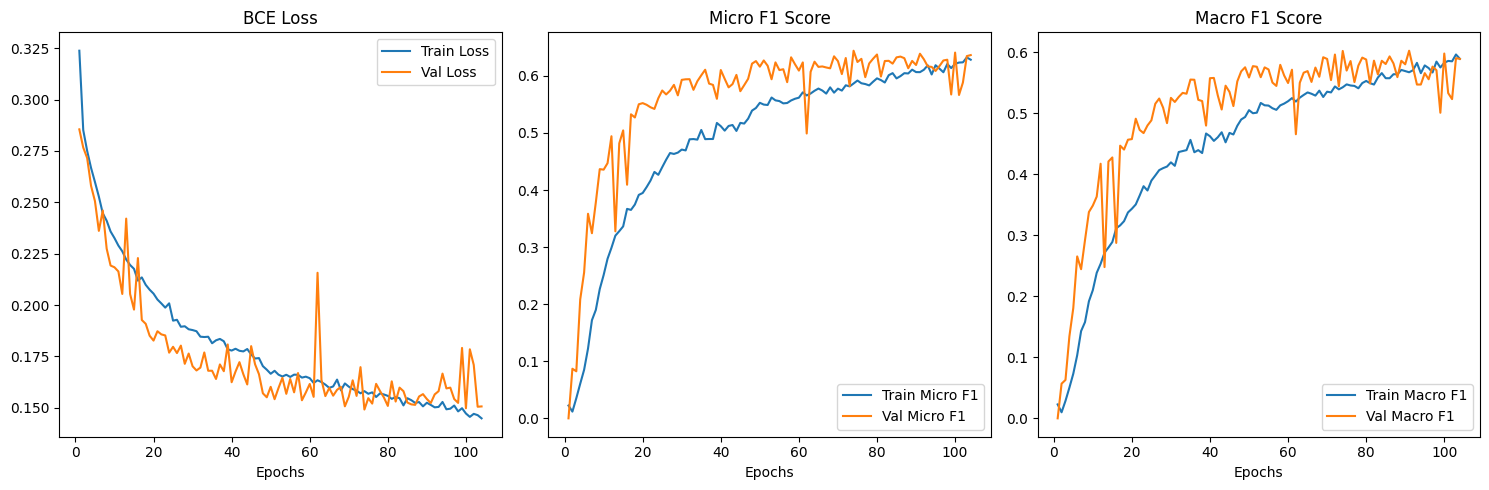

In [4]:
plot_metrics(history)

